In [1]:
import seaborn as sns 
df = sns.load_dataset('titanic')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#TASK 1
abs_freq = df['class'].value_counts()


rel_freq = df['class'].value_counts(normalize=True) * 100

cum_freq = abs_freq.cumsum()


freq_table = pd.DataFrame({
    'Absolute Frequency': abs_freq,
    'Relative Frequency (%)': rel_freq.round(2),
    'Cumulative Frequency': cum_freq
})
print(freq_table)

        Absolute Frequency  Relative Frequency (%)  Cumulative Frequency
class                                                                   
Third                  491                   55.11                   491
First                  216                   24.24                   707
Second                 184                   20.65                   891


In [ ]:
#TASK 2
contingency_table = pd.crosstab(df['sex'], df['survived'], margins=True)
print(contingency_table)


survived    0    1  All
sex                    
female     81  233  314
male      468  109  577
All       549  342  891


In [ ]:
#Task 3
total = len(df)

joint_prob = len(df[(df['sex'] == 'female') & (df['survived'] == 1)]) / total

marginal_female = len(df[df['sex'] == 'female']) / total
marginal_survived = len(df[df['survived'] == 1]) / total

cond_surv_given_female = joint_prob / marginal_female
cond_female_given_survived = joint_prob / marginal_survived

print(f"Joint P(female, survived=1): {joint_prob:.4f}")
print(f"Marginal P(female): {marginal_female:.4f}")
print(f"Marginal P(survived=1): {marginal_survived:.4f}")
print(f"Conditional P(survived=1 | female): {cond_surv_given_female:.4f}")
print(f"Conditional P(female | survived=1): {cond_female_given_survived:.4f}")

Joint P(female, survived=1): 0.2615
Marginal P(female): 0.3524
Marginal P(survived=1): 0.3838
Conditional P(survived=1 | female): 0.7420
Conditional P(female | survived=1): 0.6813


Pearson correlation (age vs fare): 0.0961


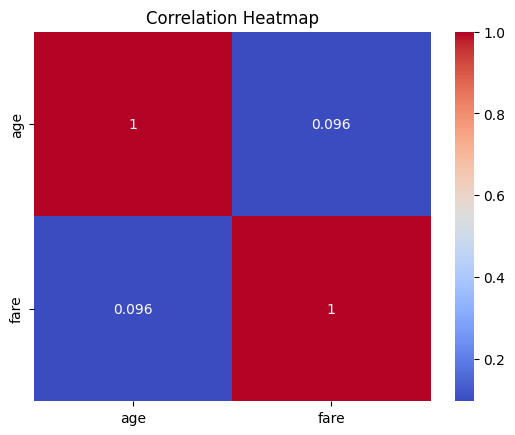

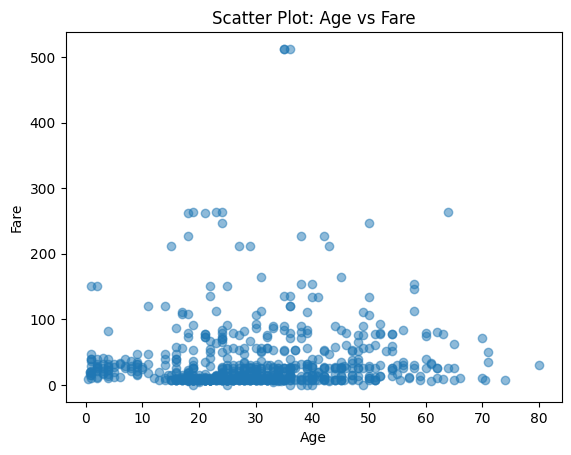

In [ ]:
#TASK 4
numeric_df = df[['age', 'fare']].dropna() #null values cause error during plotting

correlation = numeric_df.corr().iloc[0,1]
print(f"Pearson correlation (age vs fare): {correlation:.4f}")

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

plt.scatter(numeric_df['age'], numeric_df['fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')
plt.show()


TASK 5

The coefficient is positive (+0.096), which means:As age increases, fare also tends to increase slightly — but not strongly.
The value 0.096 lies between 0 and 0.3, which is considered a very weak positive correlation.

The positive sign suggests that older passengers tended to pay slightly higher fares, but the relationship is not strong.
Since the value is close to 0, we can say that age and fare are nearly uncorrelated in this dataset.

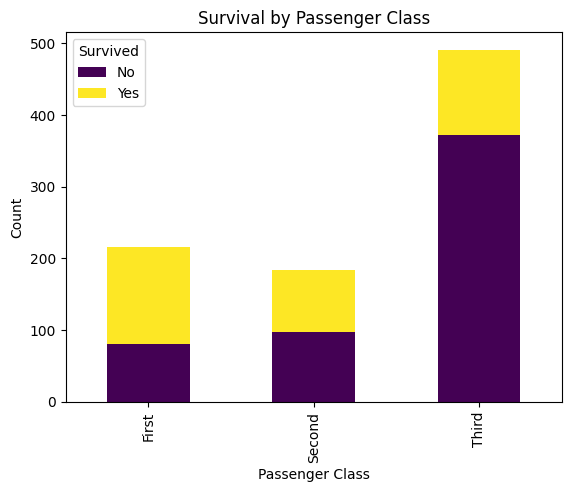

In [ ]:
#TASK 6
survival_by_class = pd.crosstab(df['class'], df['survived'])

survival_by_class.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()
